<a href="https://colab.research.google.com/github/toche7/mdsLab3/blob/student/Lab6_Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 6. Regularization Technique

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('https://raw.githubusercontent.com/toche7/DataSets/main/ex2data2.txt',header = None)
df.columns = ['test1','test2','y']
df.head()

,test1,test2,y
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


<Axes: xlabel='test1', ylabel='test2'>

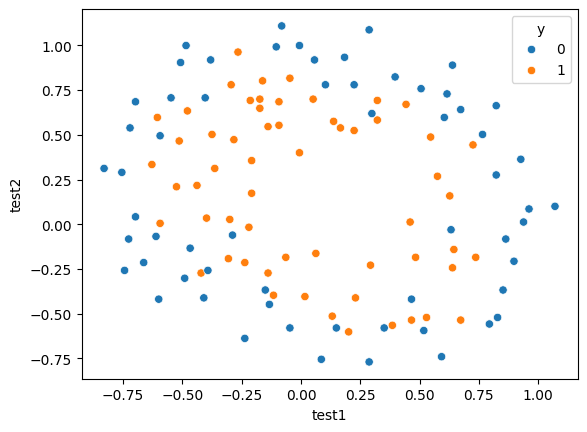

In [8]:
import seaborn as sns
sns.scatterplot(data=df,x='test1',y='test2',hue='y')

In [10]:
X = df[['test1','test2']]
y = df['y']

In [34]:

from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=6, include_bias=False)

X_poly = poly_features.fit_transform(X)

print(X_poly.shape)

(118, 27)


In [39]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e3)


In [40]:
logreg.fit(X_poly, y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1000.0)

In [41]:
logreg.score(X_poly, y)

0.864406779661017

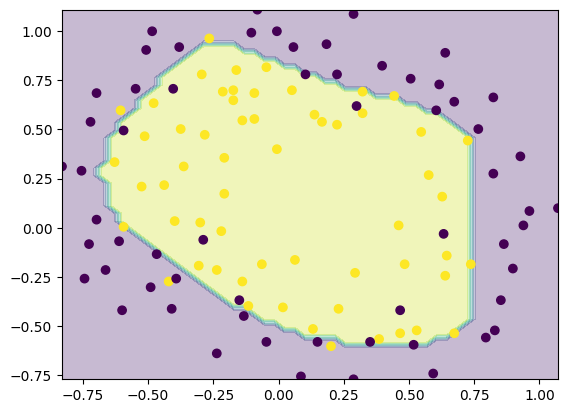

In [42]:
# prompt: draw the decision boundary of model logreg

import matplotlib.pyplot as plt
import numpy as np

# Create a meshgrid for plotting
x1_min, x1_max = X['test1'].min(), X['test1'].max()
x2_min, x2_max = X['test2'].min(), X['test2'].max()
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))

# Predict the class labels for the meshgrid points
Z = logreg.predict(poly_features.fit_transform(np.c_[xx1.ravel(), xx2.ravel()])).reshape(xx1.shape)

# Plot the decision boundary
plt.contourf(xx1, xx2, Z, alpha=0.3)

# Plot the data points
plt.scatter(X['test1'], X['test2'], c=y, cmap='viridis')

# Show the plot
plt.show()
